In [ ]:
%%html
<b> <h1>Author: Rajdeep Chatterjee</h1> </b>
<b> <h3>OOPs Concept with OpenCV for City with Buildings (including windows and doors) </h3></b>
<a href="https://github.com/cserajdeep"> Rajdeep' Github Link</a>

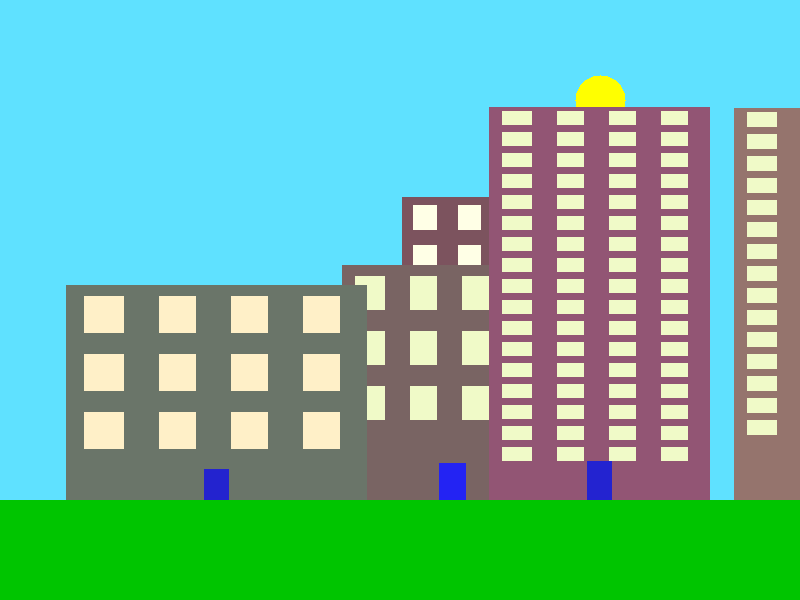

In [12]:
import numpy as np
import cv2 as cv
import random
# only for Google Colab output
from google.colab.patches import cv2_imshow

# global parameters
width = 800
height = 600
n_buildings = 6
ground_level = height-100

# background image
bg = np.zeros((height, width, 3), dtype=np.uint8)

# *********************** Declare Super Class CITY ****************************
class City:
    def __init__(self, image, day_type):
      # super-class constructor 
      self.img = image
      self.sk = day_type['sky']
      cv.rectangle(self.img,(width,0), (0, ground_level), self.sk, -1)
    
    def generate_building_base(self):
      loc = int(np.random.choice(range(width), 1))
      ht = int(np.random.choice(range(200,400), 1))
      wd = 100
      radius = 50
      scale = np.random.choice(np.linspace(1,3, num=6), 1)
      
      return loc, ht, wd, radius, scale

    def generate_building_colors(self):
        steel = (random.randint(90,130),random.randint(80,125),random.randint(100,150))
        green = (0, random.randint(130,200),0)
        light_blue = (random.randint(200,250),35,35)
        white = random.choice([(230,255,255), (200,240,255), (200,250,240)])
        yellow = (0,random.randint(200,255),random.randint(200,255))
        
        return steel, green, light_blue, white, yellow
    
    def draw_building(self):
        loc, ht, wd, radius, scale = self.generate_building_base()
        small_width = int(wd*scale-20*scale)
        steel, green, light_blue, white, yellow = self.generate_building_colors()
        
        ########################################################################
        # buildings
        cv.rectangle(self.img, (loc, ground_level-ht), (loc+int(wd*scale), ground_level), steel, -1)
        building_w = int(wd*scale)
        building_h = ground_level-ht

        ########################################################################
        # doors
        door_w = random.randint(10,20)
        door_x1 = (loc + (loc+int(wd*scale)))//2 - door_w
        door_y1 = ground_level - random.randint(30,50)

        door_x2 = (loc + (loc+int(wd*scale)))//2 + door_w
        door_y2 = ground_level
        cv.rectangle(self.img, (door_x1, door_y1), (door_x2, door_y2), light_blue, -1)

        ########################################################################
        # windows
        per1 = 4 # 4 windows (max.)
        per2 = 6 # does not matter

        # computing the position and proportion of each window
        nwindow = building_w // per1
        nfloor = building_h // per2
        window_w = nwindow // 4
        floor_h = nfloor // 4

        # initial postion of window (from first window of the first floor) 
        window_x1 = loc + window_w
        window_y1 = building_h + floor_h

        window_x2 = loc + nwindow - window_w
        window_y2 = window_y1 + nfloor - floor_h
        
        # gap between two verticle windows
        gap = 2*floor_h
        while True:
          # creating windows
          for j in range(per1):
            cv.rectangle(self.img, (window_x1, window_y1), (window_x2, window_y2), white, -1)
            window_x1 = window_x2 + 2*window_w
            window_x2 = window_x1 + 2*window_w

          # next floor - update window positions 
          window_x1 = window_x1 = loc + window_w
          window_x2 = window_x2 = loc + nwindow - window_w
          window_y1 =  window_y2 + gap
          window_y2 =  window_y1 + nfloor - floor_h
          
          # windows end before the top of the door
          if window_y2 > door_y1:
            break
              
        ########################################################################
        # ground 
        cv.rectangle(bg,(width, ground_level), (0, height), green, -1)
        
        return self.img
# *********************** Declare Sub Class DayNightOfCITY ********************

class DayNightOfCity(City):
    def __init__(self, image, day_type):
      # sub-class constructor 
      super().__init__(image, day_type)
      self.dt = day_type
      cv.circle(self.img,  self.dt['position'], self.dt['radius'], self.dt['object_color'], -1)

      # rest inherits from the City class

# *********************** The Main Driver Code ********************************

# display image
day = {'sky': (255,225,95), 'object_color': (0,255,255), 'position': (600,100), 'radius': 25}
night = {'sky': (0,0,0), 'object_color': (255,255,255), 'position': (100,100), 'radius':25}
day_type = random.choice([day, night])

daynightofcity = DayNightOfCity(bg, day_type)
for i in range(n_buildings):
  img = daynightofcity.draw_building()

# Google Colab image output
cv2_imshow(img) 

# otherwise, use the following codes

#cv.imshow('City', img) 
#cv.waitKey(0)
#cv.destroyAllWindows()